In [1]:
# Imports and set torch device
import numpy as np
import meshplot as mp
import torch
import sys
import kaolin as kal
import matplotlib.pyplot as plt
import igl

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")

print('Torch will run on:', device)

object = 'bookshelf'
obj_path = 'data/demo/' + object + '.obj'

Torch will run on: cuda:0


In [2]:
# Read mesh
mesh = kal.io.obj.import_mesh(
    obj_path,
    with_normals=True,
    with_materials=True,
)

vertices = mesh.vertices.cpu().numpy()
faces = mesh.faces.cpu().numpy()
colors = mesh.vertex_normals.cpu().numpy()
face_areas = kal.ops.mesh.face_areas(
    mesh.vertices.unsqueeze(0),
    mesh.faces
).squeeze().cpu().numpy()

print('Number of vertices: ', vertices.shape[0])
print('Number of faces: ', faces.shape[0])

Number of vertices:  5786
Number of faces:  8624


In [3]:
# Visualize mesh
np.random.seed(2024)
face_colors = np.clip(np.random.rand(faces.shape[0], 3), 0, 0.3)
face_colors[np.argmax(face_areas)] = np.array([1,0,0])
mp.plot(vertices, faces, face_colors)
plt.show()

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(3.4272670…

8624
Max: 0.3768077 for: 4155
Min: 3.1997949e-09
Avg: 0.00060012797
Median: 1.0992762e-06
Standard Deviation: 0.009989589


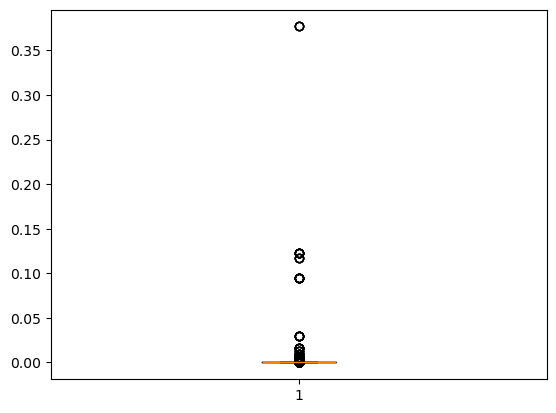

In [4]:
print(face_areas.shape[0])
print('Max:', np.max(face_areas), 'for:', np.argmax(face_areas))
print('Min:', np.min(face_areas))
print('Avg:', np.mean(face_areas))
print('Median:', np.median(face_areas))
print('Standard Deviation:', np.std(face_areas))
plt.boxplot(face_areas)
plt.show()

In [5]:
def remesh_face(vertices, faces, face_id):
    v0 = faces[face_id, 0]
    v1 = faces[face_id, 1]
    v2 = faces[face_id, 2]
    midpoint = (vertices[v0] + vertices[faces[v2]]) / 2.
    new_vertices = np.vstack((vertices, midpoint))
    new_vertex_id = vertices.shape[0]
    new_face2 = np.array([new_vertex_id, v0, v1])
    new_face1 = np.array([new_vertex_id, v1, v2])
    new_faces = np.vstack((faces, new_face1))
    new_faces = np.vstack((new_faces, new_face2))
    new_faces = np.delete(new_faces, face_id, axis=0)
    return new_vertices, new_faces

In [6]:
np.random.seed(2024)
fmax = np.argmax(face_areas)
new_vertices, new_faces = remesh_face(vertices, faces, fmax)
new_face_colors = np.clip(np.random.rand(new_faces.shape[0], 3), 0, 0.3)
new_face_colors[-1] = np.array([1, 0, 0])
new_face_colors[-2] = np.array([0, 1, 0])
mp.plot(new_vertices, new_faces, new_face_colors)
plt.show()

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(3.4272670…

8625
Max: 0.37680766 for: 4157
Min: 3.1997949e-09
Avg: 0.00060185126
Median: 1.0992769e-06
Standard Deviation: 0.009610154


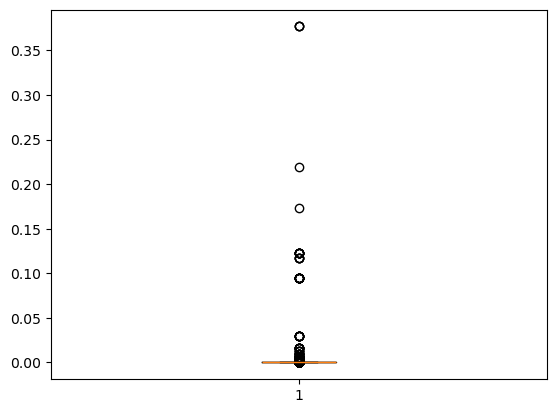

In [8]:
new_face_areas = kal.ops.mesh.face_areas(torch.tensor(new_vertices).unsqueeze(0), torch.tensor(new_faces)).cpu().numpy().squeeze()
print(new_face_areas.shape[0])
print('Max:', np.max(new_face_areas), 'for:', np.argmax(new_face_areas))
print('Min:', np.min(new_face_areas))
print('Avg:', np.mean(new_face_areas))
print('Median:', np.median(new_face_areas))
print('Standard Deviation:', np.std(new_face_areas))
plt.boxplot(new_face_areas)
plt.show()

In [24]:
for i in range(100):
    np.random.seed(2024)
    fmax = np.argmax(face_areas)
    new_vertices, new_faces = remesh_face(vertices, faces, fmax)
new_face_colors = np.random.rand(new_faces.shape[0])
mp.plot(new_vertices, new_faces, new_face_colors)
plt.show()

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(3.4272670…